# Cyclistic Bikeshare 

**M.Lakshmi siva kumar**



## Introduction

This exploratory analysis case study is towards Capstome project requirement for [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics). The case study involves a bikeshare company's data of its customer's trip details over a 12 month period (April 2020 - March 2021). 
#### Scenario

Marketing team needs to design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ.

## Objective

Hence, my objective for this analysis is to throw some light on how the two types of customers: annual members and casual riders, use Cyclistic bikeshare differently, based on few parameters that can be calculated/ obtained from existing data.

## Data Sources 

A total of 12 datasets have been made available for each month starting from April 2020 to March 2021. Each dataset captures the details of every ride logged by the customers of Cyclistic. This data that has been made publicly available has been scrubbed to omit rider's personal information.

## Documentation, Cleaning and Preparation of data for analysis

The combined size of all the 12 datasets is close to 600 MB. Data cleaning in spreadsheets will be time-consuming and slow compared to SQL or R. I am choosing R simply because I could do both data wrangling and analysis/ visualizations in the same platform. It is also an opportunity for me to learn R better.

#### Load libraries

In [1]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(readr)
library(janitor)
library(data.table)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




#### Load datasets 

In [2]:
apr20 <- read_csv("../input/divvy-chicago-bikesharing-data/202004-divvy-tripdata/202004-divvy-tripdata.csv")
may20 <- read_csv("../input/divvy-chicago-bikesharing-data/202005-divvy-tripdata/202005-divvy-tripdata.csv")
jun20 <- read_csv("../input/divvy-chicago-bikesharing-data/202006-divvy-tripdata/202006-divvy-tripdata.csv")
jul20 <- read_csv("../input/divvy-chicago-bikesharing-data/202007-divvy-tripdata/202007-divvy-tripdata.csv")
aug20 <- read_csv("../input/divvy-chicago-bikesharing-data/202008-divvy-tripdata/202008-divvy-tripdata.csv")
sep20 <- read_csv("../input/divvy-chicago-bikesharing-data/202009-divvy-tripdata/202009-divvy-tripdata.csv")
oct20 <- read_csv("../input/divvy-chicago-bikesharing-data/202010-divvy-tripdata/202010-divvy-tripdata.csv")
nov20 <- read_csv("../input/divvy-chicago-bikesharing-data/202011-divvy-tripdata/202011-divvy-tripdata.csv")
dec20 <- read_csv("../input/divvy-chicago-bikesharing-data/202012-divvy-tripdata/202012-divvy-tripdata.csv")
jan21 <- read_csv("../input/divvy-chicago-bikesharing-data/202101-divvy-tripdata/202101-divvy-tripdata.csv")
feb21 <- read_csv("../input/divvy-chicago-bikesharing-data/202102-divvy-tripdata/202102-divvy-tripdata.csv")
mar21 <- read_csv("../input/divvy-chicago-bikesharing-data/202103-divvy-tripdata/202103-divvy-tripdata.csv")



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = 

#### Check column names of each dataset for consistency

In [3]:
colnames(apr20)
colnames(may20)
colnames(jun20)
colnames(jul20)
colnames(aug20)
colnames(sep20)
colnames(oct20)
colnames(nov20)
colnames(dec20)
colnames(jan21)
colnames(feb21)
colnames(mar21)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

### Data transformation and cleaning

start_station_id and end_station_id colummns have inconsistent data type in dec20, jan21, feb21 and mar21 datasets. They need to be converted from char to double. We will use mutate() function to change the data type of these columns.

In [4]:
dec20 <-  mutate(dec20, start_station_id = as.double(start_station_id),
                 end_station_id = as.double(end_station_id))
jan21 <-  mutate(jan21, start_station_id = as.double(start_station_id),
                 end_station_id = as.double(end_station_id))
feb21 <-  mutate(feb21, start_station_id = as.double(start_station_id),
                 end_station_id = as.double(end_station_id))
mar21 <-  mutate(mar21, start_station_id = as.double(start_station_id),
                 end_station_id = as.double(end_station_id))


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Let's check if the change took effect.

In [5]:
is.double(dec20$start_station_id)
is.double(dec20$end_station_id)
is.double(jan21$start_station_id)
is.double(jan21$end_station_id)
is.double(feb21$start_station_id)
is.double(feb21$end_station_id)
is.double(mar21$start_station_id)
is.double(mar21$end_station_id)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

#### Combine all the datasets into one single dataframe

In [6]:
# combining all datasets into one dataframe
all_trips <- bind_rows(apr20, may20, jun20, jul20, aug20, sep20, oct20, nov20, dec20, jan21, feb21, mar21)

# check structure of the new dataframe
str(all_trips)

spec_tbl_df[,13] [3,489,748 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3489748] "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr [1:3489748] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3489748], format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct[1:3489748], format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr [1:3489748] "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : num [1:3489748] 86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr [1:3489748] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : num [1:3489748] 152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num [1:3489748] 41.9 41.9 41.9 41.9 41.

All looks good!

#### Remove columns not required or beyond the scope of project

In [7]:
all_trips <- all_trips %>%
    select(-c(start_lat:end_lng))
glimpse(all_trips)

Rows: 3,489,748
Columns: 9
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ ended_at           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <dbl> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <dbl> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ member_casual      <chr> "member", "member", "member", "member", "casual", "…


#### Rename columns for better readability

In [8]:
all_trips <- all_trips %>%
    rename(ride_type = rideable_type, 
           start_time = started_at,
           end_time = ended_at,
           customer_type = member_casual)
glimpse(all_trips)

Rows: 3,489,748
Columns: 9
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ ride_type          <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ start_time         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ end_time           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <dbl> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <dbl> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ customer_type      <chr> "member", "member", "member", "member", "casual", "…


#### Add new columns that can be used for aggregate functions 

In [9]:
#column for day of the week the trip started
all_trips$day_of_the_week <- format(as.Date(all_trips$start_time),'%a')

#column for month when the trip started
all_trips$month <- format(as.Date(all_trips$start_time),'%b_%y')

#column for time of the day when the trip started
#Time element needs to be extracted from start_time. However, as the times must be in POSIXct
#(only times of class POSIXct are supported in ggplot2), a two-step conversion is needed. 
#First the time is converted to a character vector, effectively stripping all the date information. 
#The time is then converted back to POSIXct with today’s date – the date is of no interest to us,
#only the hours-minutes-seconds are.
all_trips$time <- format(all_trips$start_time, format = "%H:%M")
all_trips$time <- as.POSIXct(all_trips$time, format = "%H:%M")

#column for trip duration in min
all_trips$trip_duration <- (as.double(difftime(all_trips$end_time, all_trips$start_time)))/60

# check the dataframe
glimpse(all_trips)

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ ride_type          <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ start_time         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ end_time           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <dbl> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <dbl> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ customer_type      <chr> "member", "member", "member", "member", "casual", "…
$ day_of_the_week    <chr> "Sun", "Fri", "Wed", "Tue", "Sat", "Thu", "Thu", "T…
$ month              <chr> "Apr_20", "Apr_20", "Apr_20", "Apr_20", "Apr_20", "…
$ time               <dttm> 2021-06-03 17:45:00, 2021-06-03 17:08:00, 2021-06-…
$ trip_durat

Let's check to see if the trip_duration column has any negative values, as this may cause problem while creating visualizations. Also, we do not want to include the trips that were part of quality tests by the company. These trips are usually identified by string 'test' in the start_station_name column.

In [10]:
# checking for trip lengths less than 0
nrow(subset(all_trips,trip_duration < 0))
  
#checking for testrides that were made by company for quality checks
nrow(subset(all_trips, start_station_name %like% "TEST"))
nrow(subset(all_trips, start_station_name %like% "test"))
nrow(subset(all_trips, start_station_name %like% "Test"))


[1] 10552

[1] 3364

[1] 3

[1] 0

As there are 10552 rows with trip_dration less than 0 mins and 3367 trips that were test rides, we will remove these observations from our dataframe as they contribute to only about 0.3% of the total rows. We will create a new dataframe deviod of these obseravtions without making any changes to the  existing dataframe.

In [11]:
# remove negative trip durations 
all_trips_v2 <- all_trips[!(all_trips$trip_duration < 0),]

#remove test rides
all_trips_v2<- all_trips_v2[!((all_trips_v2$start_station_name %like% "TEST" | all_trips_v2$start_station_name %like% "test")),]

#check dataframe
glimpse(all_trips_v2)

Rows: 3,475,844
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ ride_type          <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ start_time         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ end_time           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <dbl> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <dbl> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ customer_type      <chr> "member", "member", "member", "member", "casual", "…
$ day_of_the_week    <chr> "Sun", "Fri", "Wed", "Tue", "Sat", "Thu", "Thu", "T…
$ month              <chr> "Apr_20", "Apr_20", "Apr_20", "Apr_20", "Apr_20", "…
$ time               <dttm> 2021-06-03 17:45:00, 2021-06-03 17:08:00, 2021-06-…
$ trip_durat

It is important to make sure that customer_type column has only two distinct values. Let's confirm the same.

In [12]:
# checking count of distinct values
table(all_trips_v2$customer_type)
#aggregating total trip duration by customer type
setNames(aggregate(trip_duration ~ customer_type, all_trips_v2, sum), c("customer_type", "total_trip_duration(mins)"))


 casual  member 
1423876 2051968 

customer_type,total_trip_duration(mins)
<chr>,<dbl>
casual,64176592
member,33068730


## Analyze and Visualize the Data

The dataframe is now ready for descriptive analysis that will help us uncover some insights on how the casual riders and members use Cyclistic rideshare differently.

First, let's try to get some simple statistics on trip_duration for all customers, and do the same by customer_type.

In [13]:
# statictical summary of trip_duration for all trips
summary(all_trips_v2$trip_duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     7.95    14.58    27.98    26.70 58720.03 

In [14]:
#statistical summary of trip_duration by customer_type
all_trips_v2 %>%
    group_by(customer_type) %>%
    summarise(min_trip_duration = min(trip_duration),max_trip_duration = max(trip_duration),
              median_trip_duration = median(trip_duration), mean_trip_duration = mean(trip_duration))

customer_type,min_trip_duration,max_trip_duration,median_trip_duration,mean_trip_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,0,55683.88,21.26667,45.07176
member,0,58720.03,11.48333,16.11562


The mean trip duration of member riders is lower than the mean trip duration of all trips, while it is exactly the opposite for casual riders, whose mean trip duration is higher than the the mean trip duration of all trips. This tells us that casual riders usually take the bikes out for a longer duration compared to members.

#### Total number of trips by customer type and day of the week

In [15]:
# fix the order for the day_of_the_week and month variable so that they show up 
# in the same sequence in output tables and visualizations
all_trips_v2$day_of_the_week <- ordered(all_trips_v2$day_of_the_week, levels=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))
all_trips_v2$month <- ordered(all_trips_v2$month, levels=c("Apr_20", "May_20", "Jun_20", "Jul_20", "Aug_20", "Sep_20", "Oct_20",
                                                          "Nov_20", "Dec_20", "Jan_21", "Feb_21", "Mar_21"))
all_trips_v2 %>% 
  group_by(customer_type, day_of_the_week) %>%  
  summarise(number_of_rides = n(),average_duration_mins = mean(trip_duration)) %>% 
  arrange(customer_type, desc(number_of_rides))

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



customer_type,day_of_the_week,number_of_rides,average_duration_mins
<chr>,<ord>,<int>,<dbl>
casual,Sat,334933,46.97361
casual,Sun,262183,50.76010
casual,Fri,207852,42.91064
casual,Thu,165806,43.12270
casual,Wed,157849,40.45488
casual,Mon,150590,45.14851
casual,Tue,144663,40.65589
member,Sat,323109,17.79397
member,Fri,306388,15.80208


#### Visualization: 

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



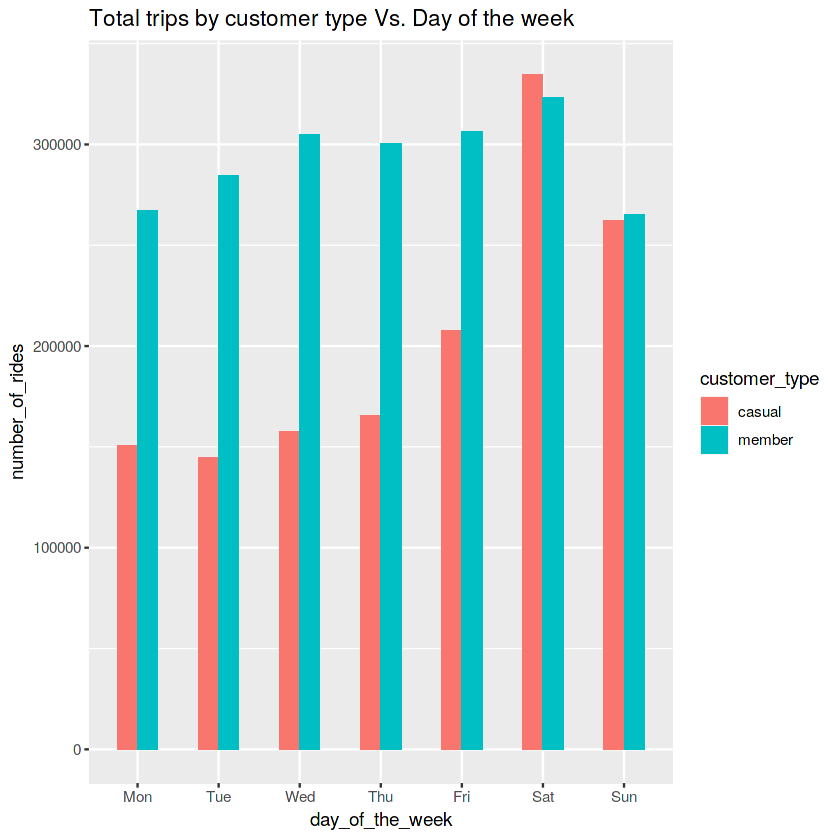

In [16]:
all_trips_v2 %>%  
  group_by(customer_type, day_of_the_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(customer_type, day_of_the_week)  %>% 
  ggplot(aes(x = day_of_the_week, y = number_of_rides, fill = customer_type)) +
  labs(title ="Total trips by customer type Vs. Day of the week") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

From the table and graph above, casual customers are most busy on Sundays followed by Saturdays, while members are most busy on later half of the week extending into the weekend. Interesting pattern to note though is the consistent trip numbers among members with less spread over entire week as compared to casual riders who don't seem to use the bikeshare services much during weekdays.

#### Average number of trips by customer type and month

In [17]:
all_trips_v2 %>% 
  group_by(customer_type, month) %>%  
  summarise(number_of_rides = n(),`average_duration_(mins)` = mean(trip_duration)) %>% 
  arrange(customer_type,desc(number_of_rides))

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



customer_type,month,number_of_rides,average_duration_(mins)
<chr>,<ord>,<int>,<dbl>
casual,Aug_20,287171,45.16081
casual,Jul_20,268549,59.98008
casual,Sep_20,229435,38.32516
casual,Jun_20,154401,51.71658
casual,Oct_20,143850,30.39722
casual,Nov_20,87810,31.85596
casual,May_20,86786,51.25173
casual,Mar_21,84032,38.15919
casual,Dec_20,29997,26.84961


#### Visualization:

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



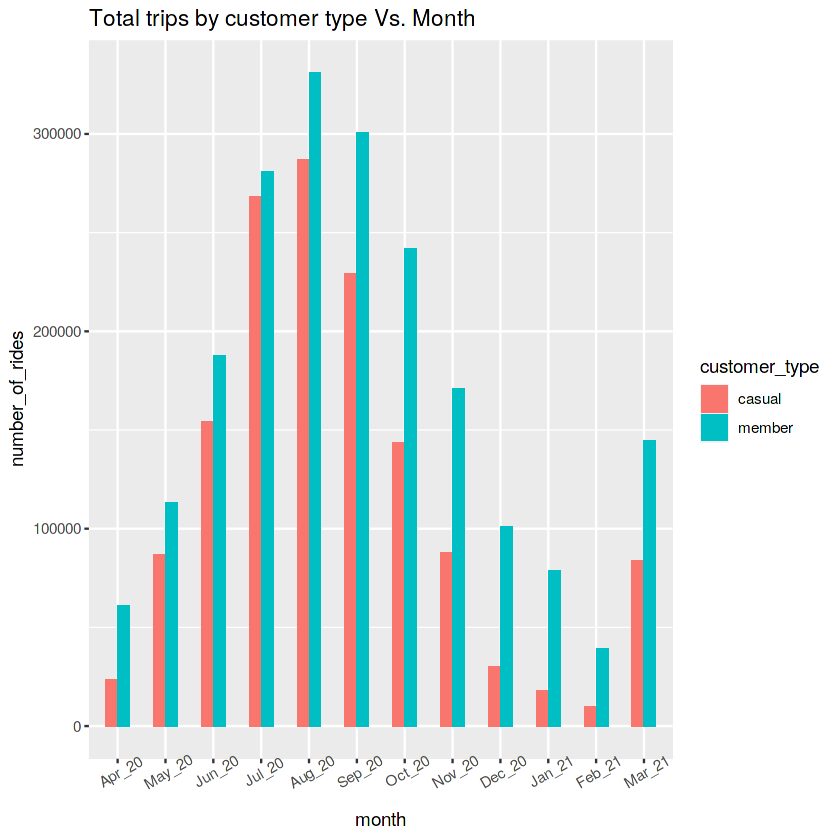

In [18]:
all_trips_v2 %>%  
  group_by(customer_type, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(customer_type, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = customer_type)) +
  labs(title ="Total trips by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

The data shows that the months of July, August and September are the most busy time of the year among both members and casual riders. The lean period of the year (Dec- Mar) show the same trend among both the type of customers. This could be attributed to an external factor (eg. cold weather, major quality issue) that might have hindered with customer needs.
However, the number of trips made by members is always higher than the casual riders across all months of the year.

#### Visualizaton of average trip duration by customer type on each day of the week

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



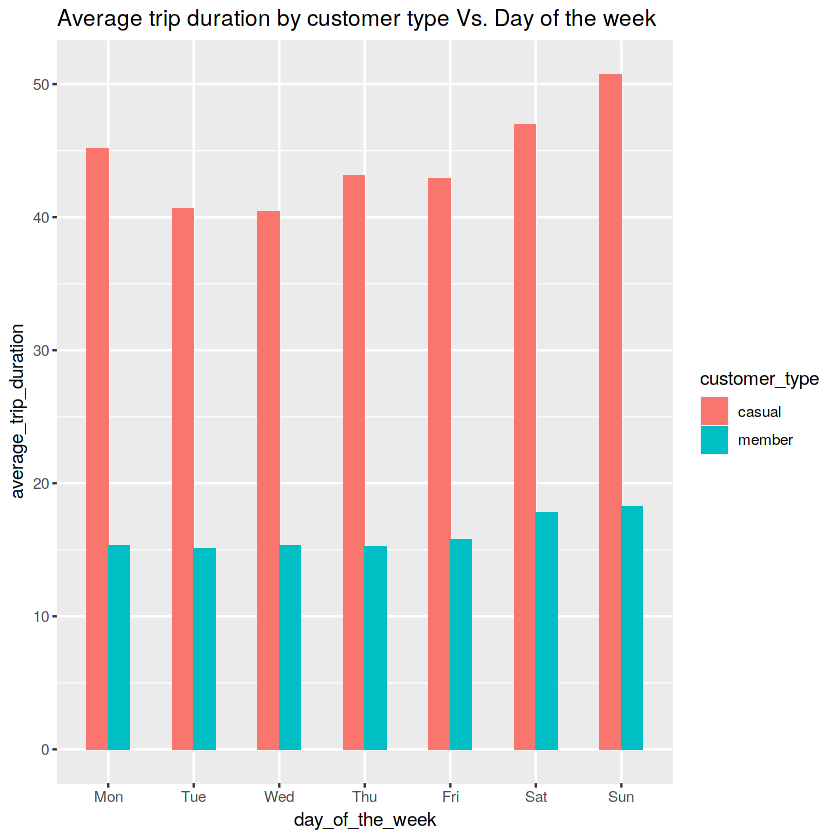

In [19]:
all_trips_v2 %>%  
  group_by(customer_type, day_of_the_week) %>% 
  summarise(average_trip_duration = mean(trip_duration)) %>%
  ggplot(aes(x = day_of_the_week, y = average_trip_duration, fill = customer_type)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Day of the week")
  

The average trip duration of a casual rider is more than twice that of a member. Note that this necessarily does not mean that casual riders travel farther distance. It is also interesting to note that weekends not only contribute to more number of trips but also longer trips on average when compared to weekdays.

#### Visualizaton of average trip duration by customer type Vs. month

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



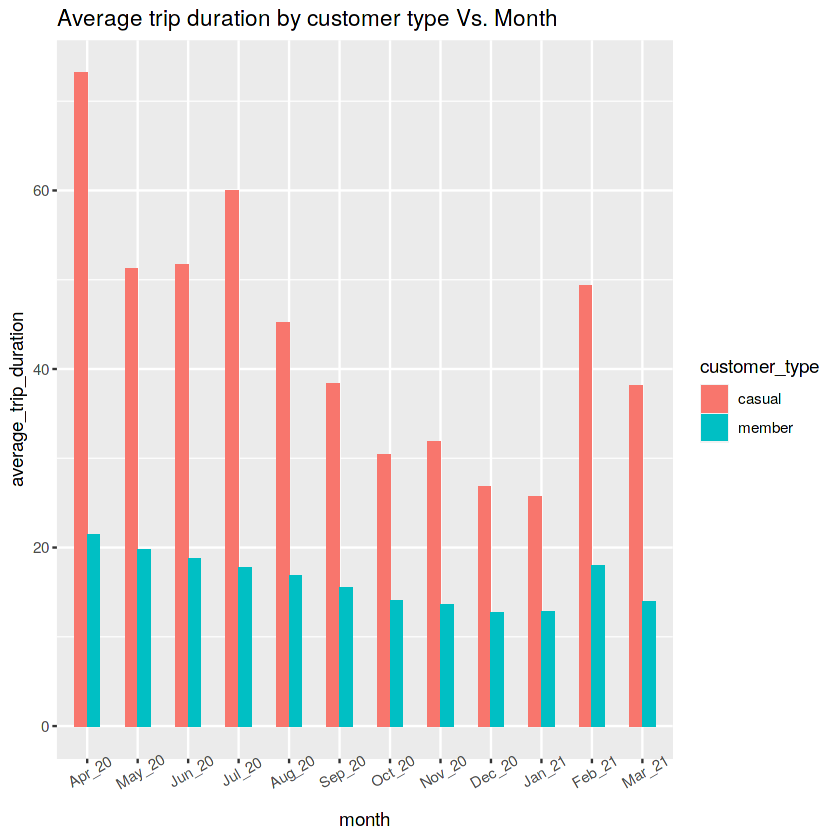

In [20]:
all_trips_v2 %>%  
  group_by(customer_type, month) %>% 
  summarise(average_trip_duration = mean(trip_duration)) %>%
  ggplot(aes(x = month, y = average_trip_duration, fill = customer_type)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30))

Average trip duration of member riders is anywhere between 10-20 minutes throughout the year, exception being April when it goes slightly over 20 minutes. However, there seems to be a distinct pattern when it comes to casual riders, whose average trip duration swings wildly from as low as ~25 minutes to more than an hour depending on time of the year. It is worth noting unusually long trip durations by casual riders in the month of April. 

#### Visualizaton of bike demand over 24 hr period (a day)

`summarise()` has grouped output by 'customer_type'. You can override using the `.groups` argument.



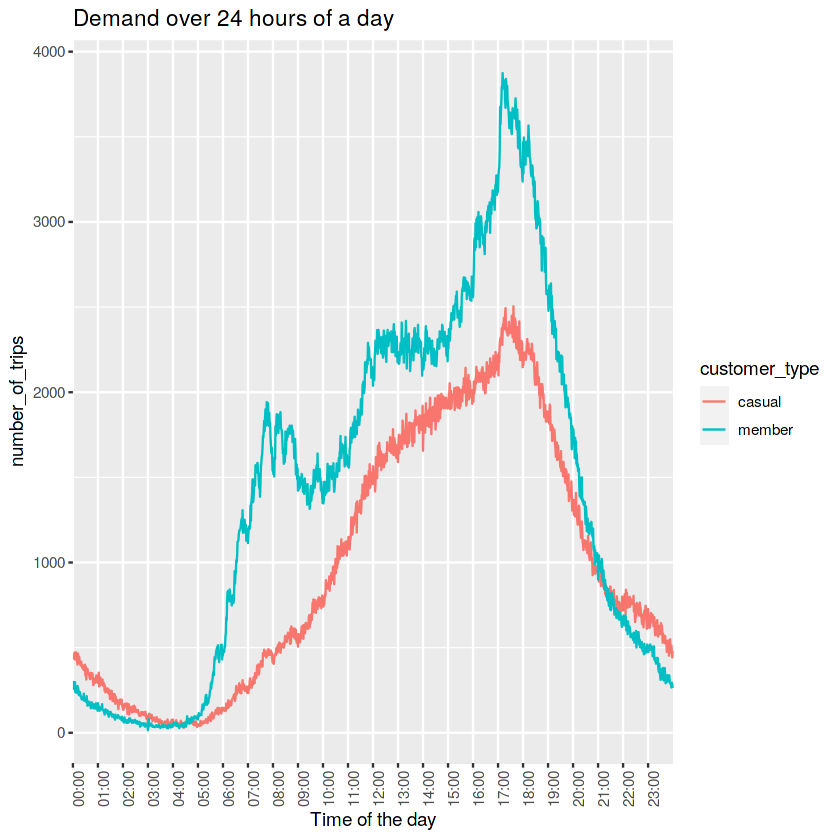

In [21]:
all_trips_v2 %>%  
  group_by(customer_type, time) %>% 
  summarise(number_of_trips = n()) %>%
  ggplot(aes(x = time, y = number_of_trips, color = customer_type, group = customer_type)) +
  geom_line() +
  scale_x_datetime(date_breaks = "1 hour", minor_breaks = NULL,
                   date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title ="Demand over 24 hours of a day", x = "Time of the day")

For the members, there seems to be two distict peak demand hours: 7-9 AM and 5-7 PM, the latter one coinciding with the peak demand hours of casual riders as well. One could probably hypothesize that office-goers make up majority of the members profile due to demand in both morning and evening hours, but we need more data to substabtiate this assumption.

#### Visualizaton of ride type Vs. number of trips by customer type

`summarise()` has grouped output by 'ride_type'. You can override using the `.groups` argument.



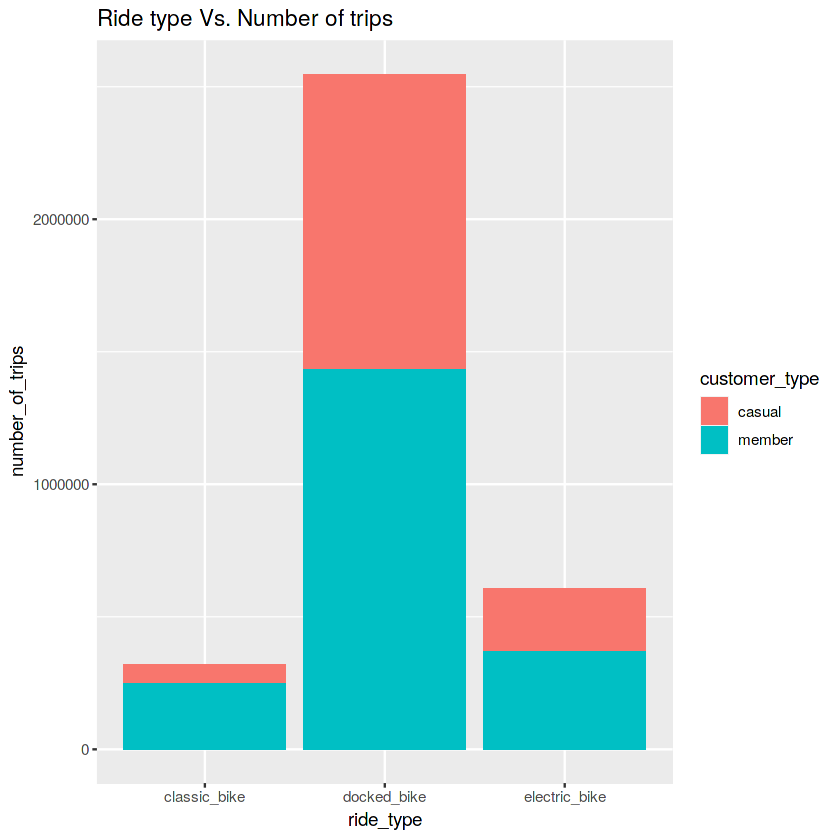

In [22]:
all_trips_v2 %>%
  group_by(ride_type, customer_type) %>%
  summarise(number_of_trips = n()) %>%  
  ggplot(aes(x= ride_type, y=number_of_trips, fill= customer_type))+
              geom_bar(stat='identity') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(title ="Ride type Vs. Number of trips")

Classic bikes are predominantly used by members. Docked bikes are in most demand and equally used by both members as well as casual riders. Electric bikes are more favored by members. If electric bikes costs the highest among all 3 types, it would be a financially sound move to increase their fleet while reducing docked bikes, as they are already preferred by members who make up for the majority of the trips.

Note: Data is not available on the quantity of fleet across each type of bikes.

#### Creating a csv file of the clean data for futher analysis or visualizations in other tools like SQL, Tableau, Power BI, etc.

In [23]:
clean_data <- aggregate(all_trips_v2$trip_duration ~ all_trips_v2$customer_type + all_trips_v2$day_of_the_week, FUN = mean)
write.csv(clean_data, "Clean Data.csv", row.names = F)

## Key Takeaways

* Casual riders made 41% of total trips contributing to 66% of total trip duration between Apr'20 - Mar'21. Member riders make up 59% of total trips contributing to 34% of total trip duration between Apr'20 - Mar'21
  
  Usage (based on trip duration) of bikes by casual riders is almost twice that of member riders.
 
* Casual customers use bikeshare services more during weekends, while members use them consistently over the entire week.

* Average trip duration of casual riders is more than twice that of member rider over any given day of the week cumulatively.

* Casual riders ride longer during first half of the year compared to the second half, while members clock relatively similar average trip duration month over month.

* Casual riders prefer docked bikes the most while classic bikes are popular among members. 


## Recommendations

* Provide attractive promotions for casual riders on weekdays so that casual members use the bikeshare services ore uniformly across the entire week.

* Offer discounted membership fee for renewals after the first year. It might nudge casual riders to take up membership.

* Offer discounted pricing during non-busy hours so that casual riders might choose to use bikes more often and level out demand over the day.



